In [1]:
import warnings
import pandas as pd
import numpy as np
import csv
warnings.filterwarnings("ignore")
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
#read in the file
df = pd.read_csv("CAERS_ASCII_2004_2017Q2.csv")
df.head()

,RA_Report #,RA_CAERS Created Date,AEC_Event Start Date,PRI_Product Role,PRI_Reported Brand/Product Name,PRI_FDA Industry Code,PRI_FDA Industry Name,CI_Age at Adverse Event,CI_Age Unit,CI_Gender,AEC_One Row Outcomes,SYM_One Row Coded Symptoms
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL..."
2,65333,1/1/2004,NaN,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13,Ice Cream Prod,NaN,Not Available,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"
3,65335,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
4,65336,1/1/2004,NaN,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,NaN,Not Available,Not Available,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"


In [3]:
df['SYM_One Row Coded Symptoms'] = df['SYM_One Row Coded Symptoms'].str.split('\s*,\s*')

In [4]:
print(len(df['PRI_Reported Brand/Product Name'].unique()))
len(df['PRI_FDA Industry Name'].unique())

45685


41

In [5]:
df1 = (
    df.set_index('PRI_FDA Industry Name')['SYM_One Row Coded Symptoms'].explode()
    .rename('symptoms').groupby(level=0).value_counts().reset_index(name='count')
)

In [6]:
df1

,PRI_FDA Industry Name,symptoms,count
0,Alcoholic Beverage,ABDOMINAL PAIN,9
1,Alcoholic Beverage,DIARRHOEA,9
2,Alcoholic Beverage,VOMITING,9
3,Alcoholic Beverage,NAUSEA,8
4,Alcoholic Beverage,MALAISE,6
...,...,...,...
14982,Whole Grain/Milled Grain Prod/Starch,TONGUE OEDEMA,1
14983,Whole Grain/Milled Grain Prod/Starch,URINARY TRACT INFECTION BACTERIAL,1
14984,Whole Grain/Milled Grain Prod/Starch,VIRAL TEST POSITIVE,1
14985,Whole Grain/Milled Grain Prod/Starch,WHEEZING,1


In [7]:
top_15_industries_by_freq = df['PRI_FDA Industry Name'].value_counts().index.tolist()[:15]

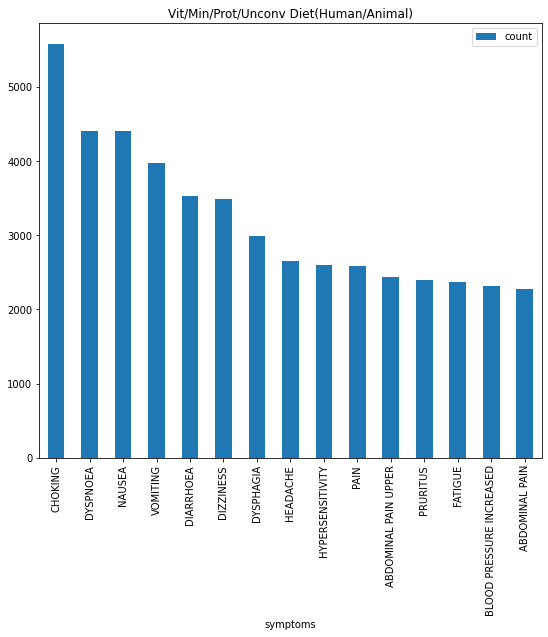

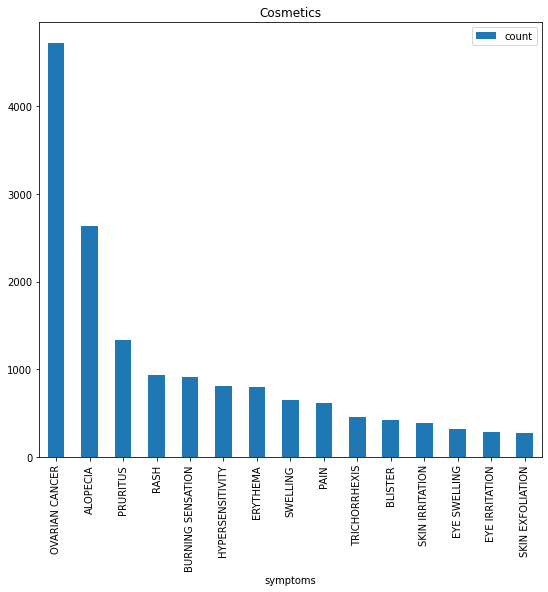

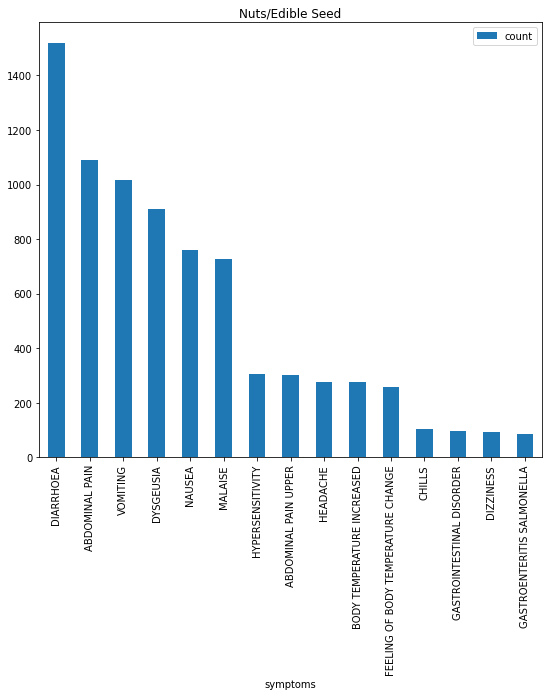

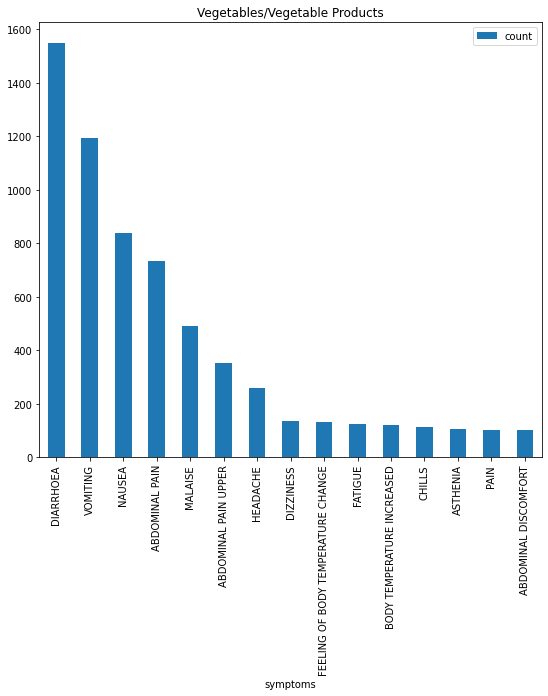

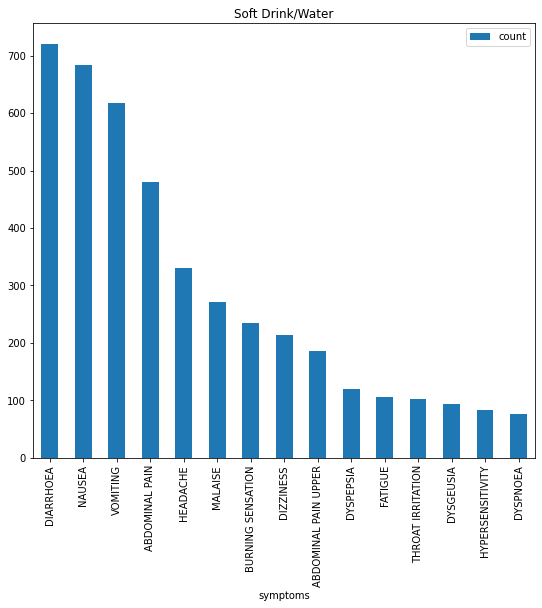

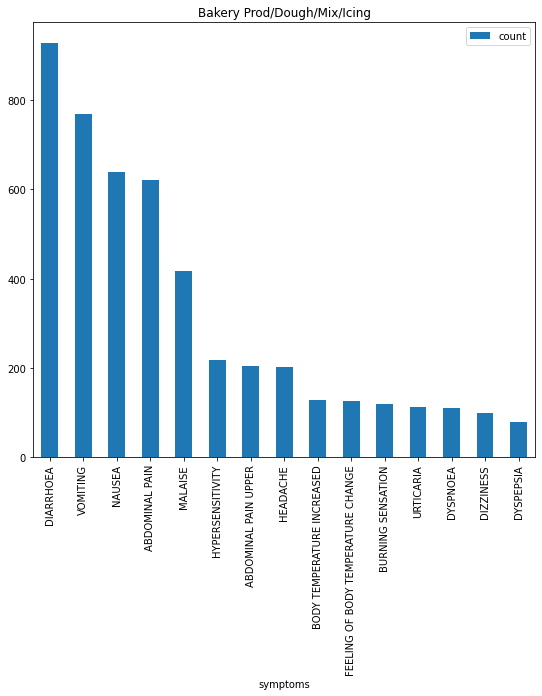

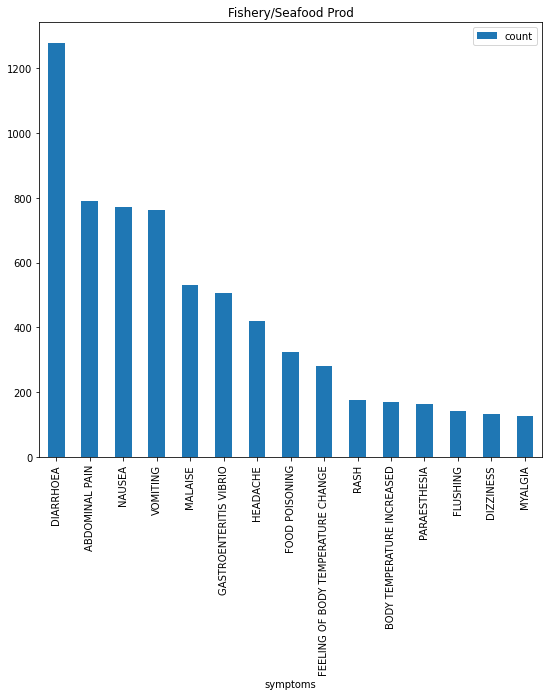

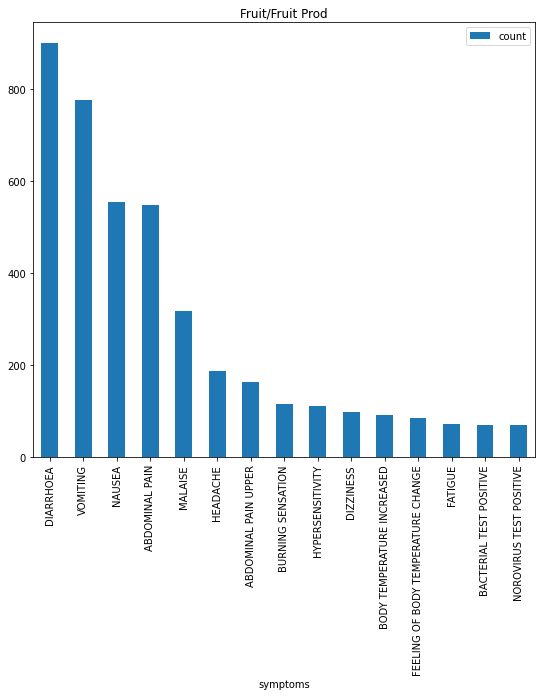

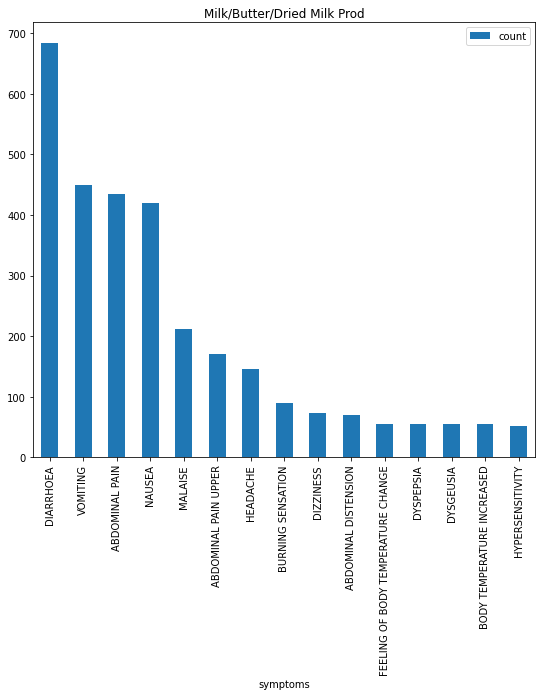

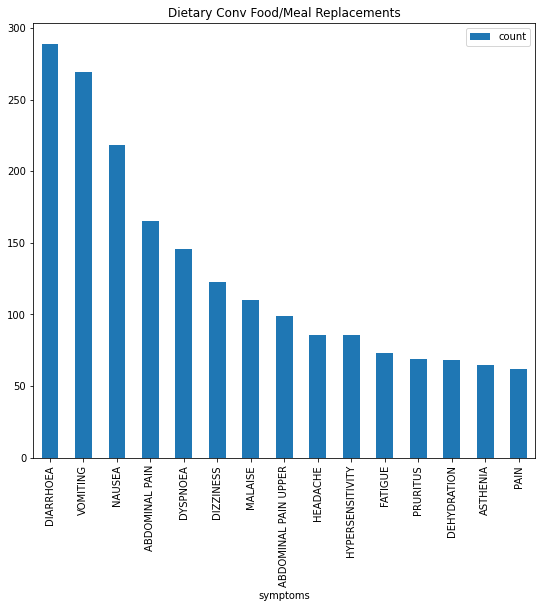

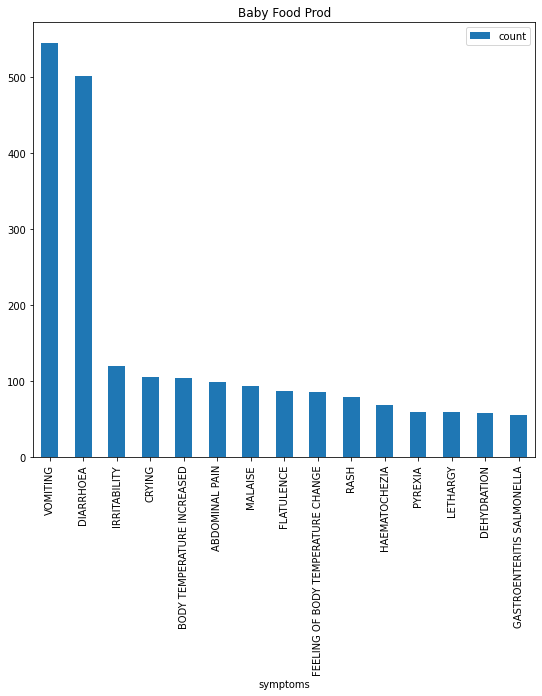

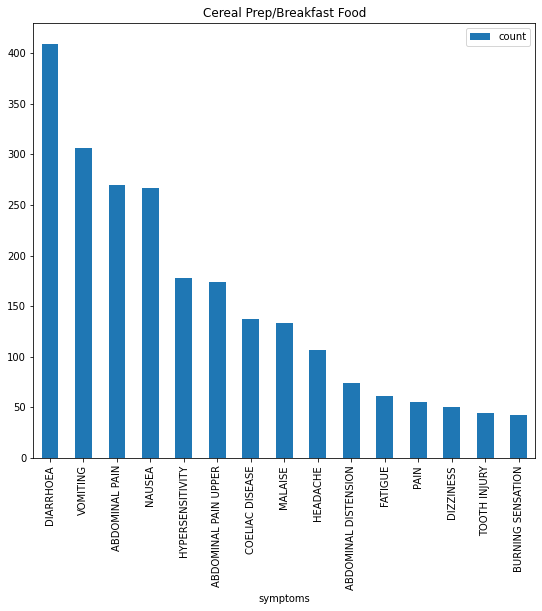

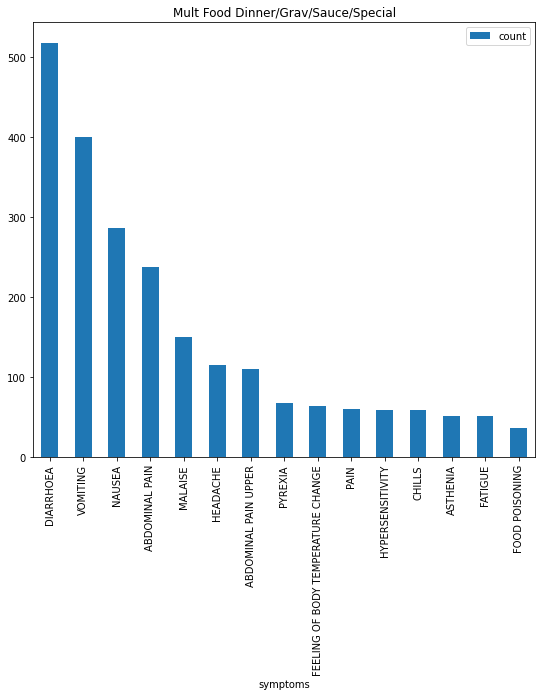

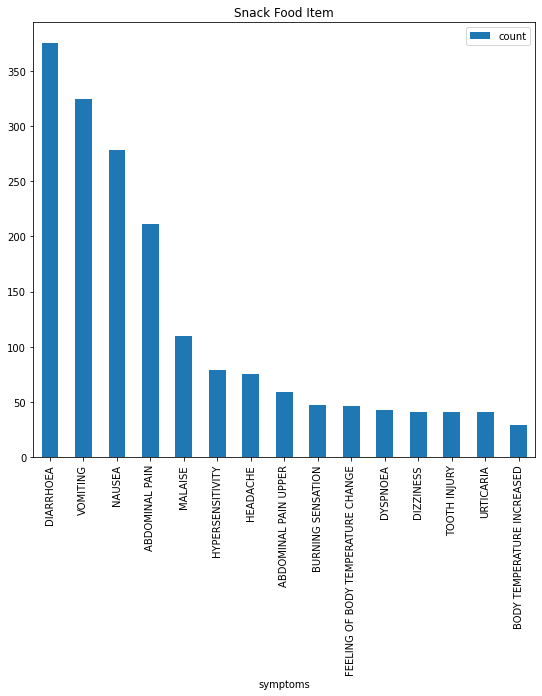

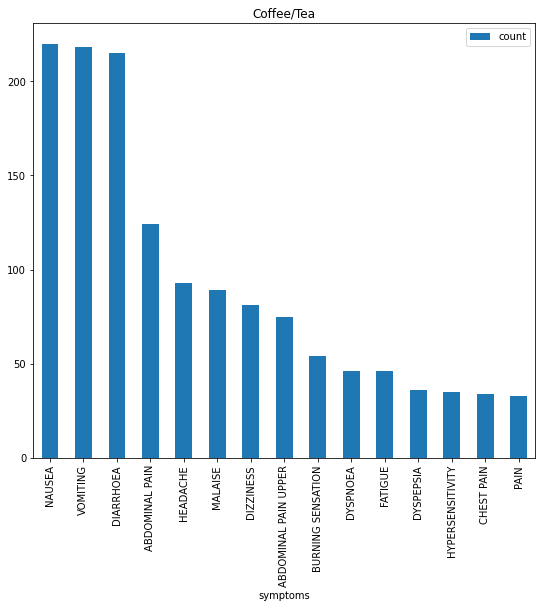

In [8]:
for industry in top_15_industries_by_freq:
    plot_df=df1.loc[df1['PRI_FDA Industry Name'] == str(industry)].sort_values('count', ascending=False)[:15]
    plot_df.plot(x="symptoms",y= "count", kind="bar", figsize=(9, 8))
    plt.title(industry)
    plt.show()

In [9]:
df['AEC_One Row Outcomes'] = df['AEC_One Row Outcomes'].str.split('\s*,\s*')

In [10]:
df2 = (
    df.set_index('PRI_FDA Industry Name')['AEC_One Row Outcomes'].explode()
    .rename('outcomes').groupby(level=0).value_counts().reset_index(name='count')
)
df2

,PRI_FDA Industry Name,outcomes,count
0,Alcoholic Beverage,VISITED AN ER,14
1,Alcoholic Beverage,HOSPITALIZATION,12
2,Alcoholic Beverage,NON-SERIOUS INJURIES/ ILLNESS,11
3,Alcoholic Beverage,LIFE THREATENING,6
4,Alcoholic Beverage,VISITED A HEALTH CARE PROVIDER,4
...,...,...,...
388,Whole Grain/Milled Grain Prod/Starch,LIFE THREATENING,13
389,Whole Grain/Milled Grain Prod/Starch,DISABILITY,10
390,Whole Grain/Milled Grain Prod/Starch,REQ. INTERVENTION TO PRVNT PERM. IMPRMNT.,7
391,Whole Grain/Milled Grain Prod/Starch,NONE,1


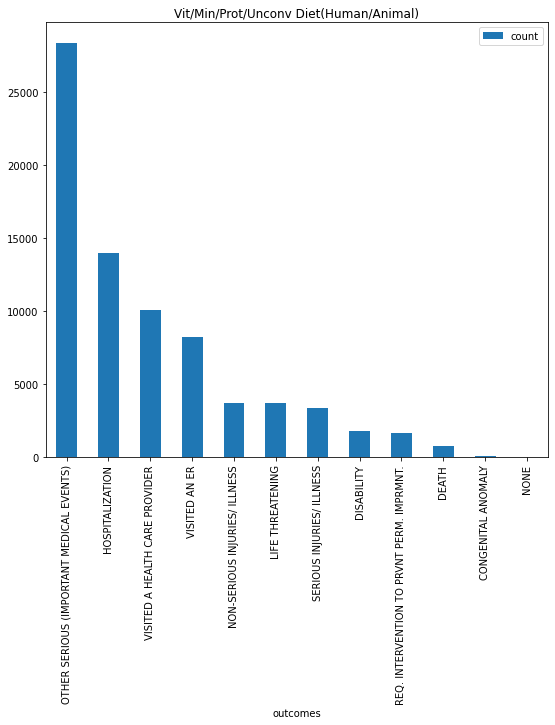

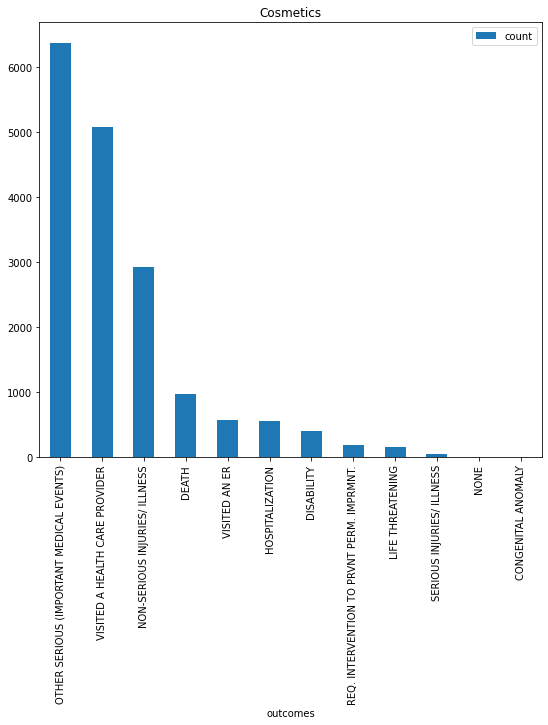

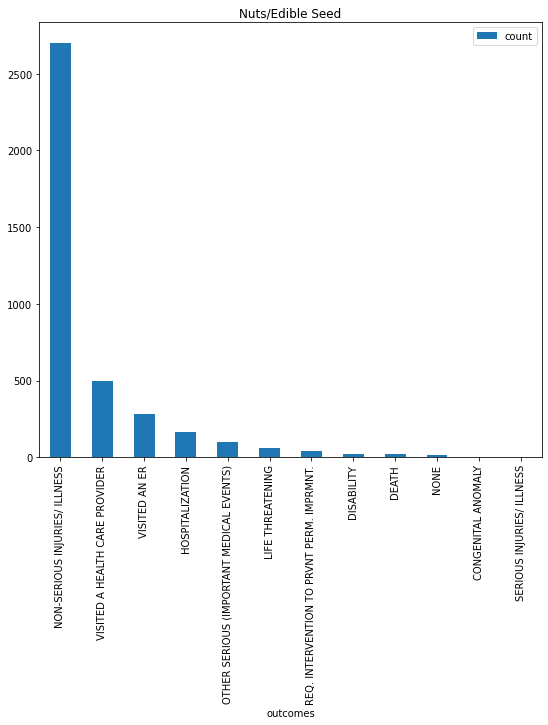

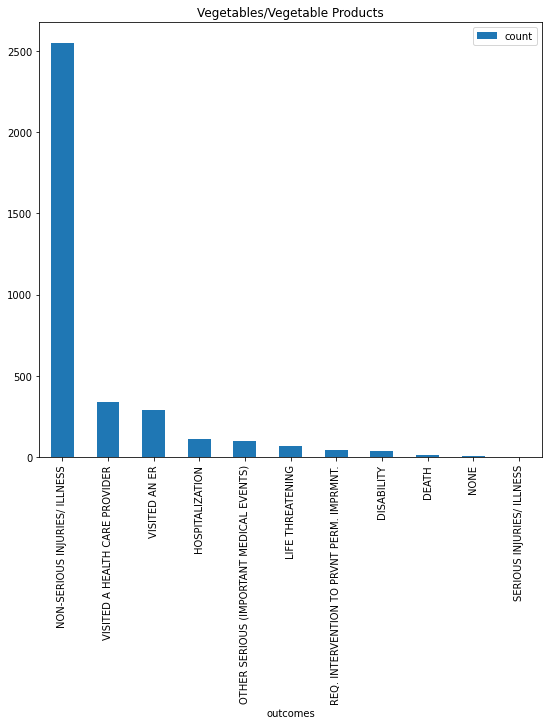

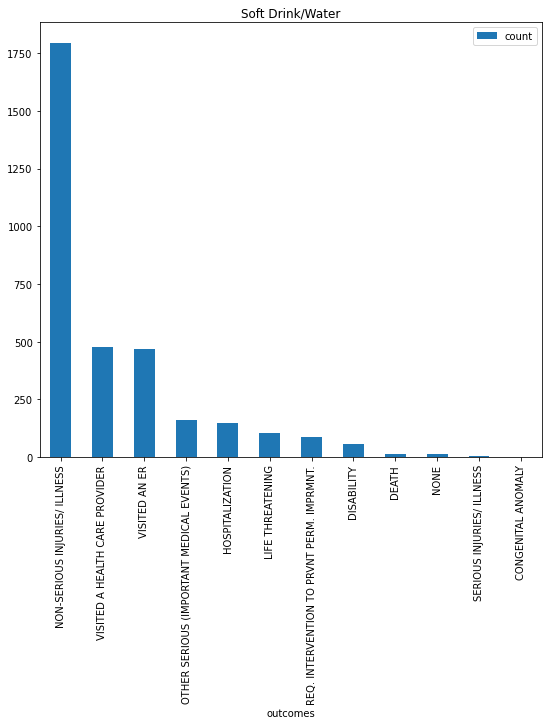

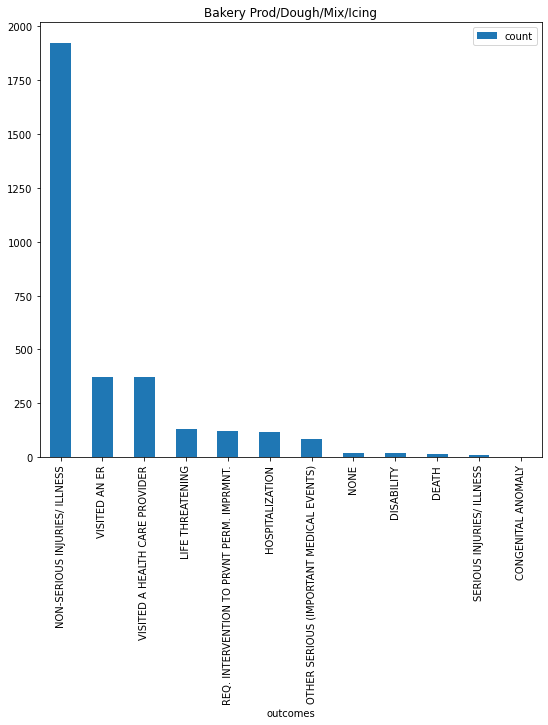

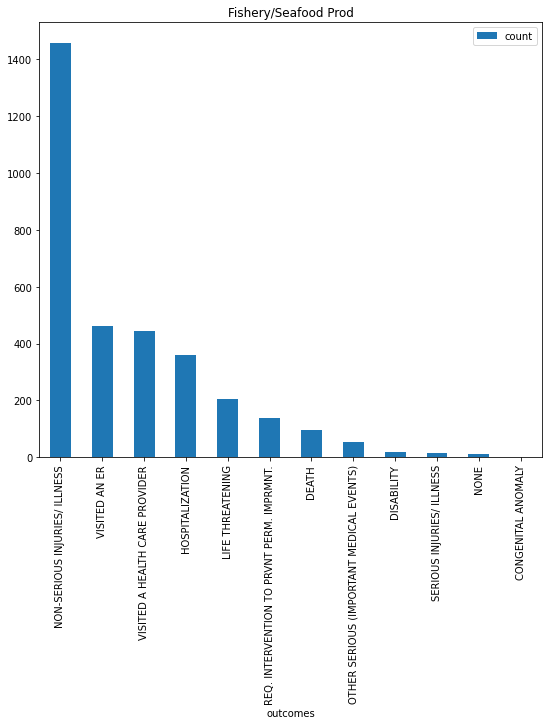

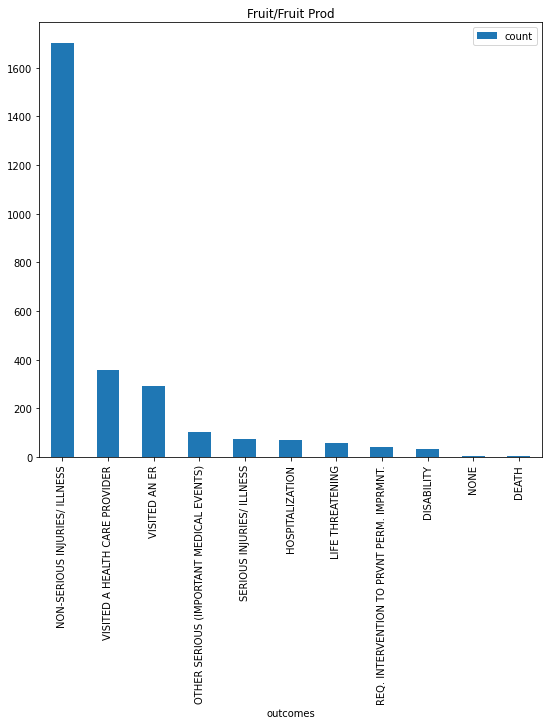

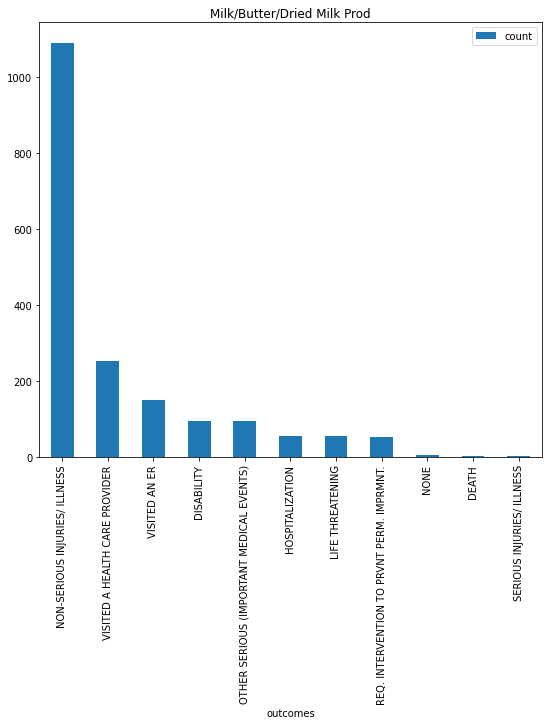

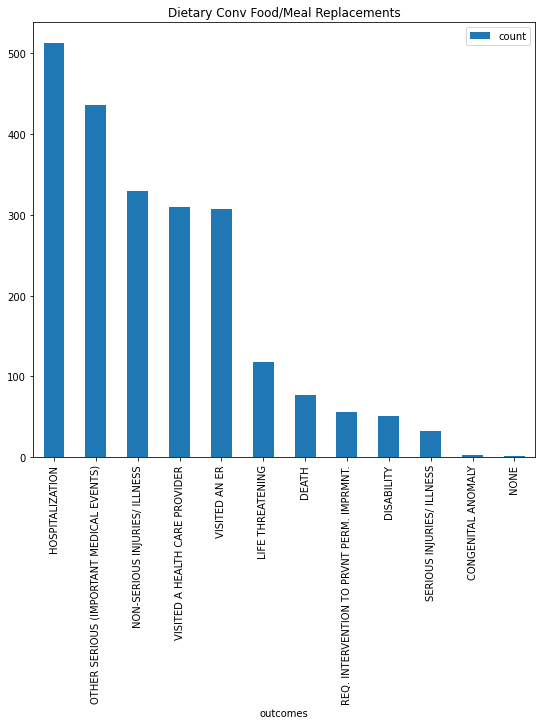

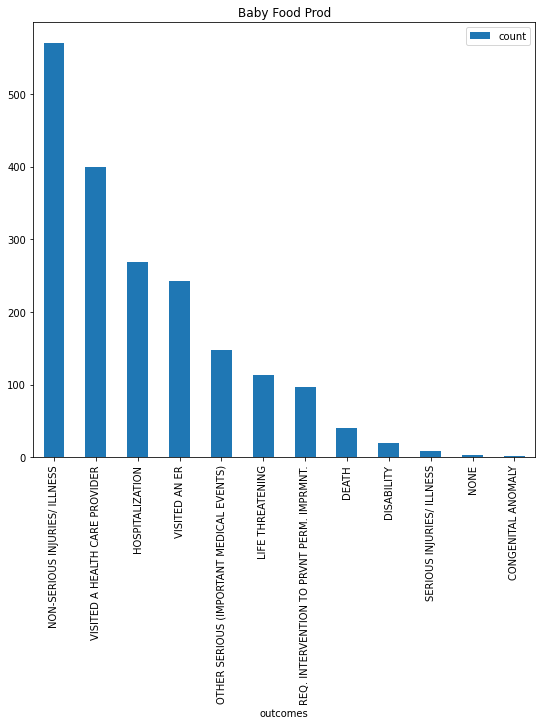

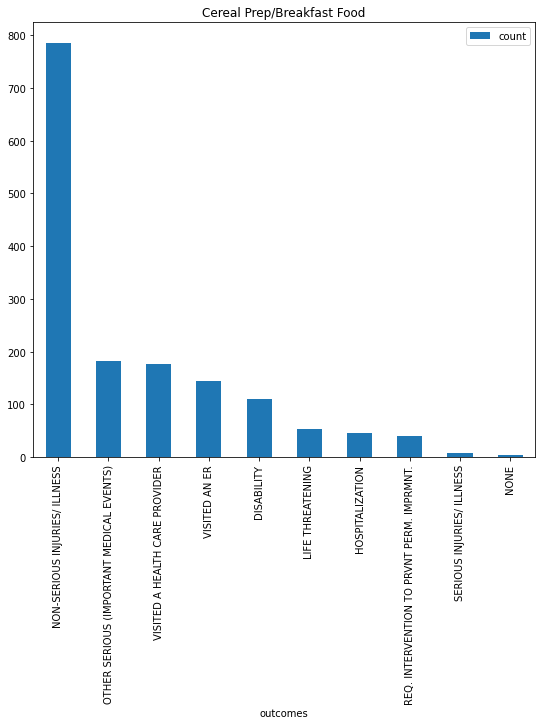

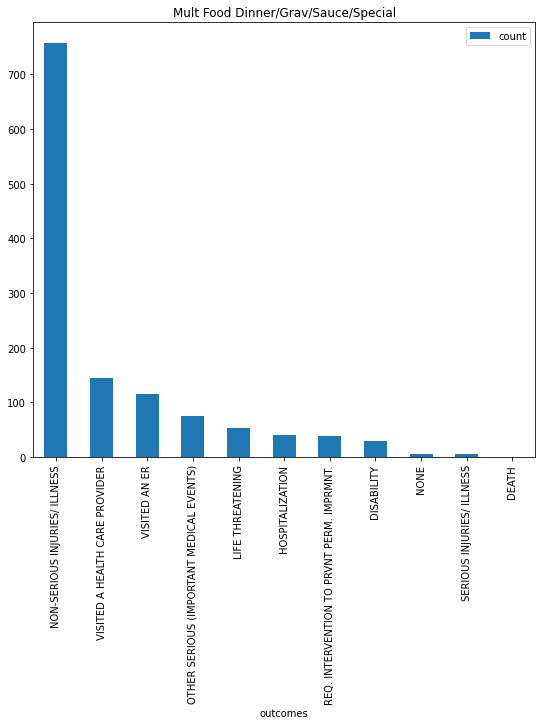

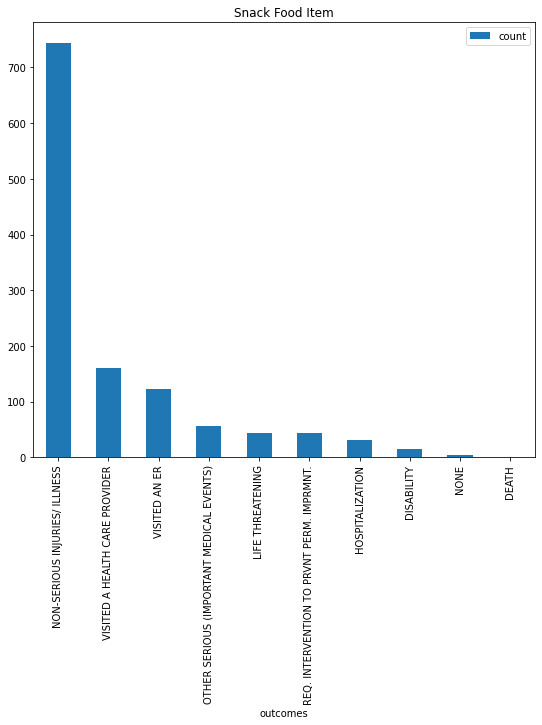

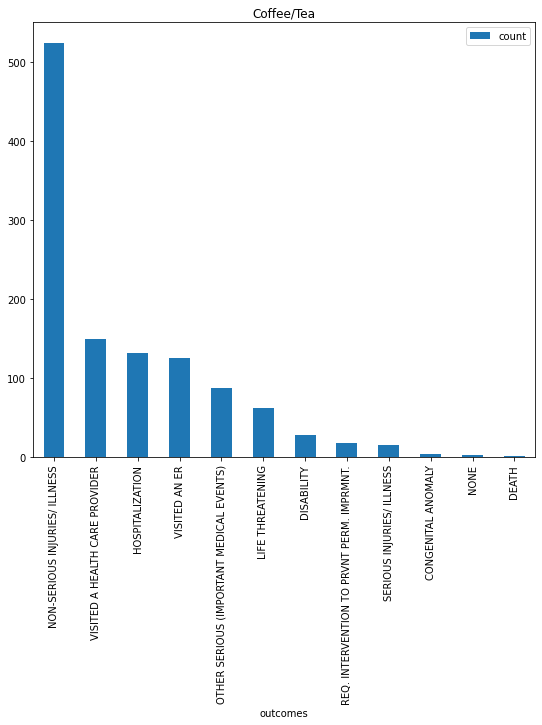

In [11]:
for industry in top_15_industries_by_freq:
    plot_df=df2.loc[df2['PRI_FDA Industry Name'] == str(industry)].sort_values('count', ascending=False)[:15]
    plot_df.plot(x='outcomes',y= "count", kind="bar", figsize=(9, 8))
    plt.title(industry)

In [12]:
# Renaming columns
df = df.rename(columns = {
    'SYM_One Row Coded Symptoms': 'Symptoms',
    'AEC_One Row Outcomes': 'Outcomes',
    'CI_Gender': 'Gender',
    'CI_Age Unit': 'Age',
    'CI_Age at Adverse Event': 'Age_at_event',
    'PRI_FDA Industry Name': 'Industry',
    'PRI_FDA Industry Code': 'Industry_code',
    'PRI_Reported Brand/Product Name': 'Product_name', 
    'PRI_Product Role': 'Product_role', 
    'AEC_Event Start Date': 'Reported_date', 
    'RA_CAERS Created Date': 'Entered_date', 
    'RA_Report #': 'ID'
})
df[['ID',
'Entered_date',
'Reported_date',
'Product_role',
'Product_name',
'Industry_code',
'Industry',
'Age_at_event',
'Age',
'Gender',
'Outcomes',
'Symptoms']].isna().sum()

ID                   0
Entered_date         0
Reported_date    37133
Product_role         0
Product_name         0
Industry_code        0
Industry             0
Age_at_event     37860
Age                  0
Gender               0
Outcomes             0
Symptoms             5
dtype: int64

In [13]:
from wordcloud import WordCloud
from collections import Counter

word_could_dict = Counter(list(df1.symptoms))
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(word_could_dict)
wordcloud.to_file("symptoms_wordcloud.png")


word_could_dict = Counter(list(df2.outcomes))
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(word_could_dict)
wordcloud.to_file("outcomes_wordcloud.png")

In [14]:
# Renaming columns and dropping null values
df = df.rename(columns = {
    'SYM_One Row Coded Symptoms': 'Symptoms',
    'AEC_One Row Outcomes': 'Outcomes',
    'CI_Gender': 'Gender',
    'CI_Age Unit': 'Age',
    'CI_Age at Adverse Event': 'Age_at_event',
    'PRI_FDA Industry Name': 'Industry',
    'PRI_FDA Industry Code': 'Industry_code',
    'PRI_Reported Brand/Product Name': 'Product_name', 
    'PRI_Product Role': 'Product_role', 
    'AEC_Event Start Date': 'Reported_date', 
    'RA_CAERS Created Date': 'Entered_date', 
    'RA_Report #': 'ID'
})

In [15]:
outcomes_list_serious = ['REQ. INTERVENTION TO PRVNT PERM. IMPRMNT.', 'HOSPITALIZATION', 'DEATH', 'LIFE THREATENING', 'DISABILITY', 'SERIOUS INJURIES/ ILLNESS', 'CONGENITAL ANOMALY', 'OTHER SERIOUS (IMPORTANT MEDICAL EVENTS)']
outcomes_list_nonserious = ['VISITED AN ER', 'VISITED A HEALTH CARE PROVIDER', 'NON-SERIOUS INJURIES/ ILLNESS', 'NONE']

In [16]:
df.head()

,ID,Entered_date,Reported_date,Product_role,Product_name,Industry_code,Industry,Age_at_event,Age,Gender,Outcomes,Symptoms
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"[VISITED AN ER, VISITED A HEALTH CARE PROVIDER...","[SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITA..."
1,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"[VISITED AN ER, VISITED A HEALTH CARE PROVIDER...","[SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITA..."
2,65333,1/1/2004,NaN,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13,Ice Cream Prod,NaN,Not Available,Female,[VISITED AN ER],"[NAUSEA, DYSGEUSIA, DIARRHOEA]"
3,65335,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Not Available,[NON-SERIOUS INJURIES/ ILLNESS],"[GASTROINTESTINAL DISORDER, VOMITING]"
4,65336,1/1/2004,NaN,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,NaN,Not Available,Not Available,[VISITED A HEALTH CARE PROVIDER],"[GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION]"


In [17]:
df['Outcomes_bool'] = df['Outcomes'].map(lambda x:1 if len(set(outcomes_list_serious) & set(x)) >= 1 else 0)
df.head()

,ID,Entered_date,Reported_date,Product_role,Product_name,Industry_code,Industry,Age_at_event,Age,Gender,Outcomes,Symptoms,Outcomes_bool
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"[VISITED AN ER, VISITED A HEALTH CARE PROVIDER...","[SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITA...",1
1,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"[VISITED AN ER, VISITED A HEALTH CARE PROVIDER...","[SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITA...",1
2,65333,1/1/2004,NaN,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13,Ice Cream Prod,NaN,Not Available,Female,[VISITED AN ER],"[NAUSEA, DYSGEUSIA, DIARRHOEA]",0
3,65335,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Not Available,[NON-SERIOUS INJURIES/ ILLNESS],"[GASTROINTESTINAL DISORDER, VOMITING]",0
4,65336,1/1/2004,NaN,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,NaN,Not Available,Not Available,[VISITED A HEALTH CARE PROVIDER],"[GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION]",0


<AxesSubplot:xlabel='Industry'>

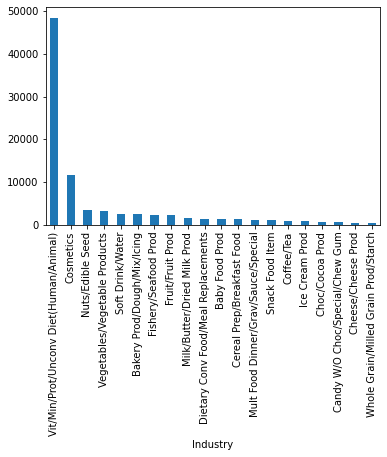

In [18]:
df.groupby('Industry')['Product_name'].agg('count').sort_values(ascending=False)[:20].plot(kind='bar')

<AxesSubplot:xlabel='Industry'>

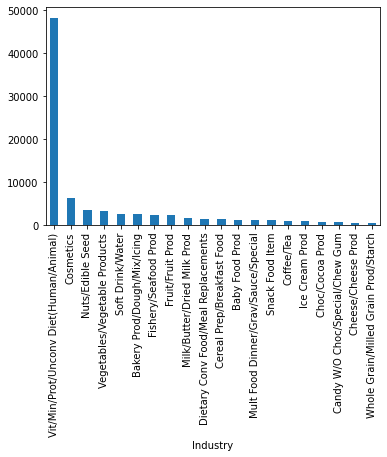

In [19]:
df[df['Product_name']!="REDACTED"].groupby('Industry')['Product_name'].agg('count').sort_values(ascending=False)[:20].plot(kind='bar')

In [20]:
# Defining date range
df['Date_range'] = (pd.to_datetime(df['Entered_date']) - pd.to_datetime(df['Reported_date'])).dt.days

In [21]:
# Changing the age to all one unit
def compute_age(x):
  time_measurements = {
        'Year(s)': 1,
        'Month(s)': 1/12, 
        'Week(s)': 1/52, 
        'Day(s)': 1/365, 
        'Not Available': 0,
        'Decade(s)': 10
    }
  try:
    return x['Age_at_event'] * time_measurements[x['Age']]
  except:
    pass

df['Age'] = df.apply(compute_age, axis=1)
df.head()

,ID,Entered_date,Reported_date,Product_role,Product_name,Industry_code,Industry,Age_at_event,Age,Gender,Outcomes,Symptoms,Outcomes_bool,Date_range
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,2.00,Female,"[VISITED AN ER, VISITED A HEALTH CARE PROVIDER...","[SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITA...",1,150.0
1,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,2.00,Female,"[VISITED AN ER, VISITED A HEALTH CARE PROVIDER...","[SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITA...",1,150.0
2,65333,1/1/2004,NaN,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13,Ice Cream Prod,NaN,NaN,Female,[VISITED AN ER],"[NAUSEA, DYSGEUSIA, DIARRHOEA]",0,NaN
3,65335,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,0.25,Not Available,[NON-SERIOUS INJURIES/ ILLNESS],"[GASTROINTESTINAL DISORDER, VOMITING]",0,38.0
4,65336,1/1/2004,NaN,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,NaN,NaN,Not Available,[VISITED A HEALTH CARE PROVIDER],"[GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION]",0,NaN


In [22]:
# One hot encoding for the top 100 features
# Finding the top 100 features
df.head()
concat_outcomes = pd.Series([item for sublist in list(df['Outcomes']) for item in sublist])
print(concat_outcomes.drop_duplicates())

0                                   VISITED AN ER
1                  VISITED A HEALTH CARE PROVIDER
2       REQ. INTERVENTION TO PRVNT PERM. IMPRMNT.
3                                 HOSPITALIZATION
9                   NON-SERIOUS INJURIES/ ILLNESS
12                                          DEATH
24                               LIFE THREATENING
30                                     DISABILITY
353                                          NONE
508                     SERIOUS INJURIES/ ILLNESS
770                            CONGENITAL ANOMALY
7971     OTHER SERIOUS (IMPORTANT MEDICAL EVENTS)
dtype: object


In [23]:
import functools
import operator
import matplotlib.pyplot as plt
import collections

no_of_symptoms = 300

regular_list = []

def transform(nested_list):
    for ele in nested_list:
        if type(ele) is list:
            regular_list.append(ele)
        else:
            regular_list.append([ele])
    return regular_list

regular_2D_list = transform(df['Symptoms'].values)
total_symptoms = functools.reduce(operator.iconcat, regular_2D_list, [])

symptoms_frequency_df = pd.Series(dict(collections.Counter(total_symptoms)))
top_symptoms = symptoms_frequency_df.sort_values(ascending=False)[:no_of_symptoms].index
print(top_symptoms)

Index(['DIARRHOEA', 'VOMITING', 'NAUSEA', 'ABDOMINAL PAIN', 'MALAISE',
       'CHOKING', 'DYSPNOEA', 'HEADACHE', 'HYPERSENSITIVITY', 'DIZZINESS',
       ...
       'DEPRESSED MOOD', 'LIPASE INCREASED', 'HAIR GROWTH ABNORMAL',
       'IRRITABLE BOWEL SYNDROME', 'HEPATOCELLULAR INJURY', 'SHOCK',
       'BONE PAIN', 'HEAD INJURY', 'STOMATITIS', 'CELLULITIS'],
      dtype='object', length=300)


In [24]:
# Filter out Symptoms to only include top 100
def filter_symptoms(x):
    try:
        return list(set(x['Symptoms']) & set(top_symptoms))
    except:
        return None
df['Filtered_symptoms'] = df.apply(filter_symptoms, axis=1)
df = df.dropna(subset='Filtered_symptoms')
print(df)
len(df)

           ID Entered_date Reported_date Product_role  \
0       65325     1/1/2004      8/4/2003      Suspect   
1       65325     1/1/2004      8/4/2003      Suspect   
2       65333     1/1/2004           NaN      Suspect   
3       65335     1/1/2004    11/24/2003      Suspect   
4       65336     1/1/2004           NaN      Suspect   
...       ...          ...           ...          ...   
90781  214516    6/29/2017     1/20/2017  Concomitant   
90782  214516    6/29/2017     1/20/2017  Concomitant   
90783  214516    6/29/2017     1/20/2017      Suspect   
90784  214604    6/30/2017           NaN      Suspect   
90785  214610    6/30/2017           NaN      Suspect   

                                            Product_name  Industry_code  \
0          MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS              3   
1          MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS              3   
2      KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...             13   
3              

90781

In [25]:
# Getting dummies
symptoms_df = pd.DataFrame(df['Filtered_symptoms'].tolist())
symptoms_obj = symptoms_df.stack()
symptoms_df = pd.get_dummies(symptoms_obj)
symptoms_df.head()

ABASIA  ABDOMINAL DISCOMFORT  ABDOMINAL DISTENSION  ABDOMINAL PAIN  \
0 0       0                     0                     0               0   
  1       0                     0                     0               0   
  2       0                     0                     0               0   
  3       0                     0                     0               0   
  4       0                     0                     0               0   

     ABDOMINAL PAIN UPPER  ABORTION SPONTANEOUS  ACNE  \
0 0                     0                     0     0   
  1                     0                     0     0   
  2                     0                     0     0   
  3                     0                     0     0   
  4                     0                     0     0   

     ACTIVITIES OF DAILY LIVING IMPAIRED  AGGRESSION  AGITATION  ...  VERTIGO  \
0 0                                    0           0          0  ...        0   
  1                                    0           0          0  ...        0   
  2                                    0           0          0  ...        0   
  3                                    0           0          0  ...        0   
  4                                    0           0          0  ...        0   

     VISION BLURRED  VISUAL ACUITY REDUCED  VISUAL IMPAIRMENT  VOMITING  \
0 0               0                      0                  0         0   
  1               0                      0                  0         0   
  2               0                      0                  0         0   
  3               0                      0                  0         0   
  4               0                      0                  0         0   

     WEIGHT DECREASED  WEIGHT INCREASED  WHEEZING  \
0 0                 0                 0         0   
  1                 0                 0         0   
  2                 0                 0         0   
  3                 0                 0         0   
  4                 0                 0         1   

     WHITE BLOOD CELL COUNT INCREASED  WOUND  
0 0                                 0      0  
  1                                 0      0  
  2                                 0      0  
  3                                 0      0  
  4                                 0      0  

[5 rows x 300 columns]

In [26]:
# Getting the original index back
symptoms_df = symptoms_df.groupby(level=0).sum()
symptoms_df.head()
symptoms_df.columns

Index(['ABASIA', 'ABDOMINAL DISCOMFORT', 'ABDOMINAL DISTENSION',
       'ABDOMINAL PAIN', 'ABDOMINAL PAIN UPPER', 'ABORTION SPONTANEOUS',
       'ACNE', 'ACTIVITIES OF DAILY LIVING IMPAIRED', 'AGGRESSION',
       'AGITATION',
       ...
       'VERTIGO', 'VISION BLURRED', 'VISUAL ACUITY REDUCED',
       'VISUAL IMPAIRMENT', 'VOMITING', 'WEIGHT DECREASED', 'WEIGHT INCREASED',
       'WHEEZING', 'WHITE BLOOD CELL COUNT INCREASED', 'WOUND'],
      dtype='object', length=300)

In [27]:
# Rejoining the dataframe with the one-hot encodings
df = pd.concat([df, symptoms_df], axis=1)
df.head()

,ID,Entered_date,Reported_date,Product_role,Product_name,Industry_code,Industry,Age_at_event,Age,Gender,...,VERTIGO,VISION BLURRED,VISUAL ACUITY REDUCED,VISUAL IMPAIRMENT,VOMITING,WEIGHT DECREASED,WEIGHT INCREASED,WHEEZING,WHITE BLOOD CELL COUNT INCREASED,WOUND
0,65325.0,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3.0,Bakery Prod/Dough/Mix/Icing,2.0,2.00,Female,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,65325.0,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3.0,Bakery Prod/Dough/Mix/Icing,2.0,2.00,Female,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,65333.0,1/1/2004,NaN,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13.0,Ice Cream Prod,NaN,NaN,Female,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,65335.0,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40.0,Baby Food Prod,3.0,0.25,Not Available,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,65336.0,1/1/2004,NaN,Suspect,ENFIMIL LIPIL BABY FORMULA,40.0,Baby Food Prod,NaN,NaN,Not Available,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
import random
# Filling in na values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Date_range'].fillna(df['Date_range'].mean(), inplace=True)

# We fill in gender not available by a random sample
df['Gender'].replace(to_replace='Not Available', value=random.sample(['Male', 'Female'], 1)[0], inplace=True)
df.dropna(subset='Symptoms', inplace=True)
# Converting data to int instead of float
df['Date_range'] = df['Date_range'].map(lambda x: int(x))
df

,ID,Entered_date,Reported_date,Product_role,Product_name,Industry_code,Industry,Age_at_event,Age,Gender,...,VERTIGO,VISION BLURRED,VISUAL ACUITY REDUCED,VISUAL IMPAIRMENT,VOMITING,WEIGHT DECREASED,WEIGHT INCREASED,WHEEZING,WHITE BLOOD CELL COUNT INCREASED,WOUND
0,65325.0,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3.0,Bakery Prod/Dough/Mix/Icing,2.0,2.00000,Female,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,65325.0,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3.0,Bakery Prod/Dough/Mix/Icing,2.0,2.00000,Female,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,65333.0,1/1/2004,NaN,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13.0,Ice Cream Prod,NaN,50.38559,Female,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,65335.0,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40.0,Baby Food Prod,3.0,0.25000,Female,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,65336.0,1/1/2004,NaN,Suspect,ENFIMIL LIPIL BABY FORMULA,40.0,Baby Food Prod,NaN,50.38559,Female,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90781,214516.0,6/29/2017,1/20/2017,Concomitant,CALTRATE CALCIUM,54.0,Vit/Min/Prot/Unconv Diet(Human/Animal),66.0,66.00000,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90782,214516.0,6/29/2017,1/20/2017,Concomitant,VITAMIN D3,54.0,Vit/Min/Prot/Unconv Diet(Human/Animal),66.0,66.00000,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90783,214516.0,6/29/2017,1/20/2017,Suspect,SUPERIOR PREFERENCE HAIR COLORING,53.0,Cosmetics,66.0,66.00000,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90784,214604.0,6/30/2017,NaN,Suspect,DR. PERICONE NECK & CHEST CREAM,53.0,Cosmetics,NaN,50.38559,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.columns = df.columns.str.replace(' ', '_')
df_x = df.drop(columns=['ID', 'Outcomes', 'Outcomes_bool', 'Symptoms', 'Filtered_symptoms', 'Entered_date', 'Reported_date', 'Industry_code'])
df_x.head()

,Product_role,Product_name,Industry,Age_at_event,Age,Gender,Date_range,ABASIA,ABDOMINAL_DISCOMFORT,ABDOMINAL_DISTENSION,...,VERTIGO,VISION_BLURRED,VISUAL_ACUITY_REDUCED,VISUAL_IMPAIRMENT,VOMITING,WEIGHT_DECREASED,WEIGHT_INCREASED,WHEEZING,WHITE_BLOOD_CELL_COUNT_INCREASED,WOUND
0,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,Bakery Prod/Dough/Mix/Icing,2.0,2.00000,Female,150,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,Bakery Prod/Dough/Mix/Icing,2.0,2.00000,Female,150,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,Ice Cream Prod,NaN,50.38559,Female,192,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Suspect,ENFAMIL LIPIL BABY FORMULA,Baby Food Prod,3.0,0.25000,Female,38,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Suspect,ENFIMIL LIPIL BABY FORMULA,Baby Food Prod,NaN,50.38559,Female,192,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
X = pd.read_csv('input.csv').drop(columns=['Unnamed: 0', 'Age_at_event'])
print(X.head())
Y = pd.read_csv('output.csv').drop(columns='Unnamed: 0')

# Baseline accuracy
len(Y[Y==1].dropna())/len(Y)

   Product_role[Concomitant]  Product_role[Suspect]  \
0                        0.0                    1.0   
1                        0.0                    1.0   
2                        0.0                    1.0   
3                        0.0                    1.0   
4                        0.0                    1.0   

   Industry[T.Baby Food Prod]  Industry[T.Bakery Prod/Dough/Mix/Icing]  \
0                         0.0                                      1.0   
1                         0.0                                      1.0   
2                         1.0                                      0.0   
3                         0.0                                      0.0   
4                         0.0                                      0.0   

   Industry[T.Beverage Bases/Conc/Nectar]  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   

0.7662412646584507

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

Text(0, 0.5, 'Accuracy on test set')

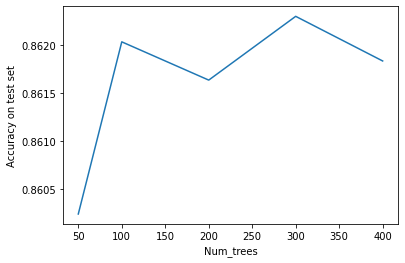

In [34]:
from sklearn import metrics
# Model seems to overfit, performing cross validation on the n_estimators
scores = {}
for num_trees in [50, 100, 200, 300, 400]:
    model = RandomForestClassifier(n_estimators=num_trees, random_state=1)
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores[num_trees] = accuracy_test
    
plt.plot([50, 100, 200, 300, 400], pd.Series(scores).sort_index().values)
plt.xlabel('Num_trees')
plt.ylabel('Accuracy on test set')

Text(0, 0.5, 'Accuracy on test set')

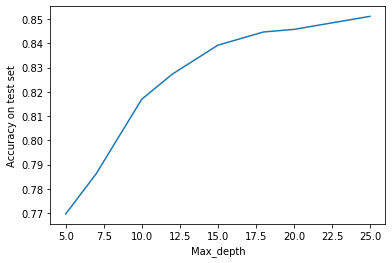

In [35]:
# 100 trees seems to be enough
# Performing CV for max depth
scores = {}
for max_depth in [5, 7, 10, 12, 15, 18, 20, 25]:
    model = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=1)
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores[max_depth] = accuracy_test

plt.plot([5, 7, 10, 12, 15, 18, 20, 25], pd.Series(scores).sort_index().values)
plt.xlabel('Max_depth')
plt.ylabel('Accuracy on test set')
    

In [36]:
# Max depth of 20 seems to be good enough
# Fitting the final model

model = RandomForestClassifier(n_estimators=100, max_depth = 20, random_state=1)

In [37]:
# Fitting the models on the training set
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=1)

In [38]:
# Accuracy scores

prediction_train = model.predict(X_train)
accuracy_train = metrics.accuracy_score(y_train, prediction_train)
prediction_test = model.predict(X_test)
accuracy_test = metrics.accuracy_score(y_test, prediction_test)

print(f"Training accuracy is {accuracy_train}")
print(f"Testing accuracy is {accuracy_test}")

Training accuracy is 0.8763865976449172
Testing accuracy is 0.8457097352179972


Text(0, 0.5, 'Precision')

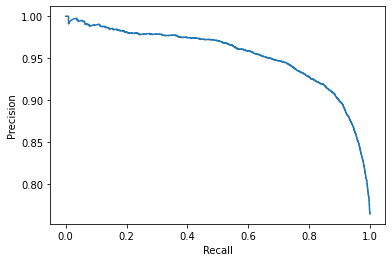

In [39]:
# ROC curve
from sklearn.metrics import precision_recall_curve

predictions = model.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, predictions[:, 1])
plt.plot(recall, precision, label='Random_Forest')

plt.xlabel('Recall')
plt.ylabel('Precision')

In [40]:
# Finding the feature importances
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

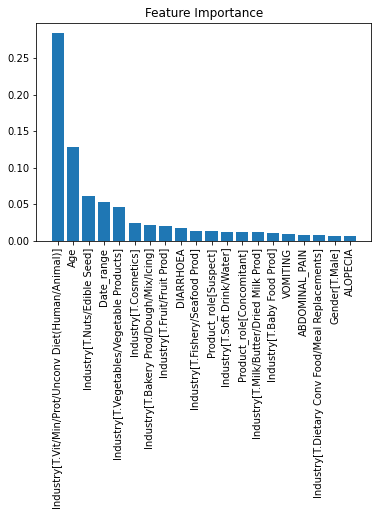

In [41]:
# Plotting the feature importances
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1])[:20], importances[sorted_indices][:20], align='center')
plt.xticks(range(X_train.shape[1])[:20], X.columns[sorted_indices][:20], rotation=90)
plt.tight_layout()
plt.show()

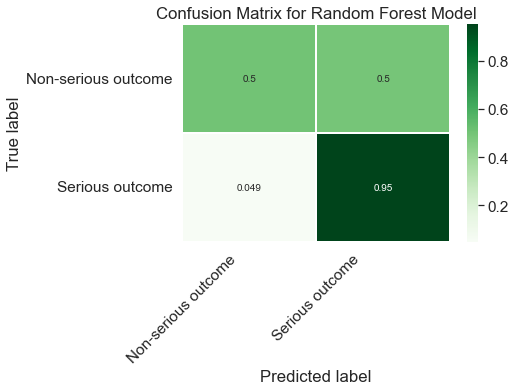

In [43]:
from sklearn.metrics import confusion_matrix
# Confusion matrix
import seaborn as sns
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, prediction_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure()
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Non-serious outcome', 'Serious outcome']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [45]:
from sklearn.metrics import classification_report
# Classification report
print(classification_report(y_test, prediction_test))


              precision    recall  f1-score   support

         0.0       0.76      0.50      0.61      3543
         1.0       0.86      0.95      0.90     11526

    accuracy                           0.85     15069
   macro avg       0.81      0.73      0.75     15069
weighted avg       0.84      0.85      0.83     15069



In [46]:
# Our recall value for serious cases = 93% which means that out of all the serious cases, we predict 93% of them right, which is good.

In [47]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [48]:
# Training and test set accuracies
prediction_train = model.predict(X_train)
print(f'Training set accuracy: {metrics.accuracy_score(y_train, prediction_train)}')
prediction_test = model.predict(X_test)
print(f'Test set accuracy: {metrics.accuracy_score(y_test, prediction_test)}')

Training set accuracy: 0.8363103703282325
Test set accuracy: 0.835490078970071


Text(0, 0.5, 'Importance')

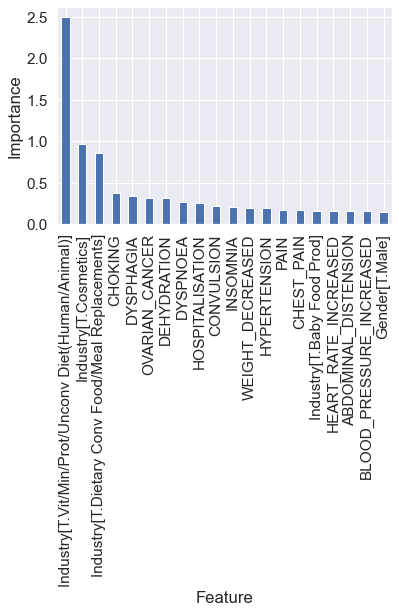

In [49]:
# Feature importance
weights = pd.Series(model.coef_[0], index=X.columns.values).sort_values(ascending=False)[:20].plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Importance')


Text(0.5, 0, 'False Positive Rate')

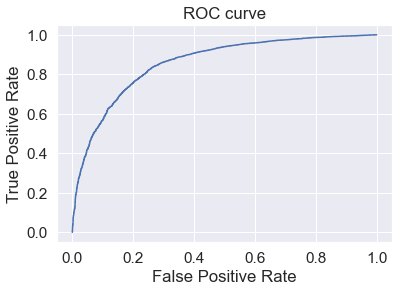

In [50]:
# ROC curve
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

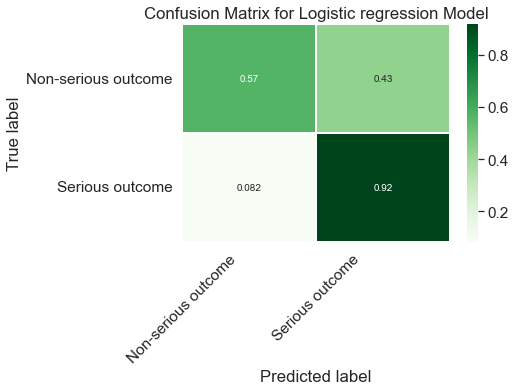

In [51]:
# Confusion matrix
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, prediction_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure()
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Non-serious outcome', 'Serious outcome']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic regression Model')
plt.show()

In [52]:
# Classification report
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

         0.0       0.68      0.57      0.62      3543
         1.0       0.87      0.92      0.90     11526

    accuracy                           0.84     15069
   macro avg       0.78      0.74      0.76     15069
weighted avg       0.83      0.84      0.83     15069



In [53]:
# Naive Bayes
from sklearn import naive_bayes
model = naive_bayes.MultinomialNB()

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, shuffle=True)

In [55]:
model.fit(X, Y)

MultinomialNB()

In [56]:
prediction_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_train))

0.739831617270607


In [57]:
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.7346871059791625


In [58]:
print('Prior probability for the negative class is',)
print(exp(model.class_log_prior_[0]))
print('Prior probability for the positive class is',)
print(exp(model.class_log_prior_[1]))

Prior probability for the negative class is
0.23375873534154917
Prior probability for the positive class is
0.7662412646584512


In [59]:
# Seeing the importance of variables    
feature_stats = pd.DataFrame({'Positive class':np.exp(model.feature_log_prob_[1]),
                           'Negative class':np.exp(model.feature_log_prob_[0])}, index=X.columns.values) 
feature_stats['Positive/Negative Ratio'] = feature_stats['Positive class']/feature_stats['Negative class']         
feature_stats['Importance'] = np.abs(np.log(feature_stats['Positive/Negative Ratio']))
feature_stats.sort_values(by='Importance', ascending=False)[:10]

,Positive class,Negative class,Positive/Negative Ratio,Importance
Industry[T.Vegetables/Vegetable Products],1.979286e-05,2.849694e-04,0.069456,2.667060
Industry[T.Nuts/Edible Seed],2.129070e-05,3.019282e-04,0.070516,2.651919
Industry[T.Egg/Egg Prod],1.390850e-06,1.968439e-05,0.070657,2.649911
Industry[T.Miscellaneous Food Related Items],2.139769e-07,2.422694e-06,0.088322,2.426767
Industry[T.Fruit/Fruit Prod],1.562031e-05,1.535382e-04,0.101736,2.285378
Industry[T.Food Service/Conveyance],1.069884e-07,9.085102e-07,0.117762,2.139085
OVERDOSE,1.208969e-05,1.514184e-06,7.984297,2.077477
Industry[T.Bakery Prod/Dough/Mix/Icing],2.460734e-05,1.820049e-04,0.135202,2.000989
Industry[T.Ice Cream Prod],7.596178e-06,5.329926e-05,0.142519,1.948277
Industry[T.Cheese/Cheese Prod],3.530618e-06,2.452977e-05,0.143932,1.938415


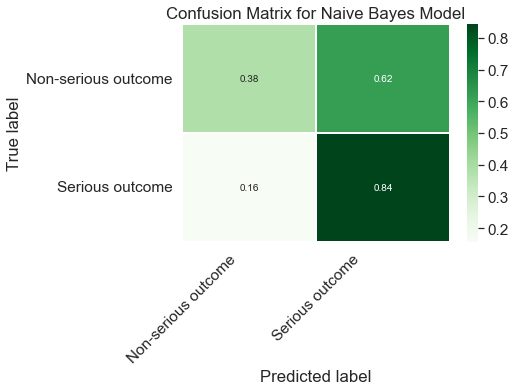

In [60]:
# Confusion matrix
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, prediction_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure()
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Non-serious outcome', 'Serious outcome']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Naive Bayes Model')
plt.show()

In [61]:
# Classification report
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

         0.0       0.43      0.38      0.40      3543
         1.0       0.82      0.84      0.83     11526

    accuracy                           0.73     15069
   macro avg       0.62      0.61      0.62     15069
weighted avg       0.72      0.73      0.73     15069



In [62]:
# KNN
# Scaling and normalizing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, shuffle=True)

In [64]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform', p=2)

In [65]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [66]:
from sklearn import metrics
prediction_on_training = model.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_on_training))

0.8246771716252347


In [67]:
predicted_classes = model.predict(X_test)
print(metrics.accuracy_score(y_test, predicted_classes))

0.8115999734554383


In [68]:
from sklearn import neighbors
from sklearn import model_selection

kfold = model_selection.StratifiedKFold(n_splits=10).split(X, Y)

In [69]:
def cv_accuracy_score(X, Y, nn):
    """For each fold, fit the nearest neighbors model
    with nn nearest neighbors on the train, and return accuracy
    on the test."""
    
    model = neighbors.KNeighborsClassifier(n_neighbors=nn, weights='uniform')
    accuracies = []
    
    kfold = model_selection.StratifiedKFold(n_splits=10, shuffle=True).split(X, Y)
    for train, holdout in kfold:
        # Select the training and testing data using the indices
        # provided by kfold
        X_train = X.iloc[train]
        X_holdout = X.iloc[holdout]
        y_train = Y.iloc[train]
        y_holdout = Y.iloc[holdout]
        
        # Fit the model
        model.fit(X_train, y_train)
        
        # Compute test accuracy
        accuracy = metrics.accuracy_score(y_holdout, model.predict(X_holdout))
        accuracies.append(accuracy)
    
    average_accuracy = pd.Series(accuracies).mean()
    return average_accuracy

cv_accuracy_score(X, Y, nn=1)

0.8048856185481472

[ 90 120 150 180 210]


Text(0, 0.5, 'Accuracy of classifier')

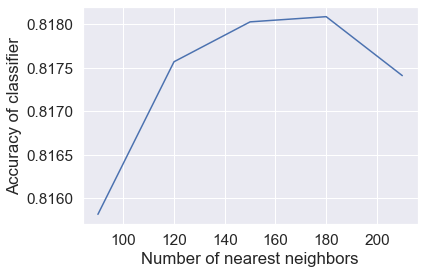

In [70]:
import numpy as np
nn = (np.array(range(5))+3)*30
print(nn)
scores = [cv_accuracy_score(X, Y, num_nbrs) for num_nbrs in nn]
plt.plot(nn, scores)
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Accuracy of classifier')

In [71]:
model = neighbors.KNeighborsClassifier(n_neighbors=180, weights='uniform', p=2)

In [72]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=180)

In [73]:
from sklearn import metrics
prediction_train = model.predict(X_train)
print(f'Training set error: {metrics.accuracy_score(y_train, prediction_train)}')
prediction_test = model.predict(X_test)
print(f'Test set error: {metrics.accuracy_score(y_test, prediction_test)}')

Training set error: 0.818647249559133
Test set error: 0.8171743314088526


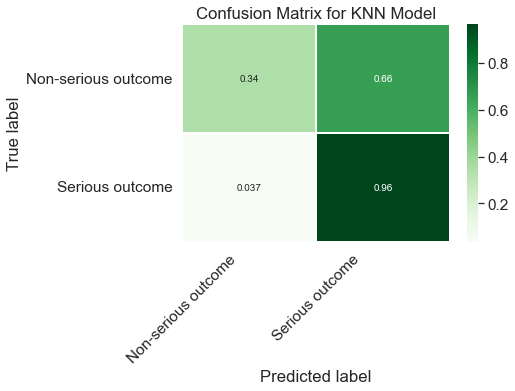

In [74]:
import seaborn as sns
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, prediction_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure()
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Non-serious outcome', 'Serious outcome']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNN Model')
plt.show()

In [75]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

         0.0       0.74      0.34      0.47      3543
         1.0       0.83      0.96      0.89     11526

    accuracy                           0.82     15069
   macro avg       0.78      0.65      0.68     15069
weighted avg       0.81      0.82      0.79     15069

